# Coursework 1: Image Filtering

In this coursework we will explore some basic image filters used in computer vision. The corresponding lectures are Lectures 3 and 4 on image filtering and edge detection.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

In [2]:
# Import libaries
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noisy
import scipy
import scipy.signal
import math
import time

# 1. Moving average filter (20 points)

**Task:** Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3, 5x5 and 9x9 respectively. Display the filtering results and comment on the results.

Please design the filter by yourself. Then, 2D image filtering can be performed using the function `scipy.signal.convolve2d()`.

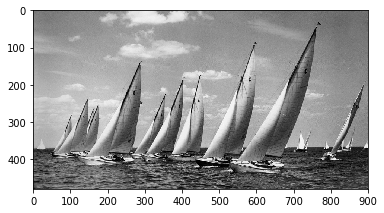

In [3]:
# Read the image
image = imageio.imread('boat.png')
plt.imshow(image, cmap='gray')

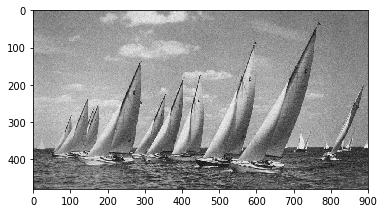

In [4]:
# Corrupt the image with Gaussian noise
image_noisy = noisy.noisy(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')

**Note:** from now on, please use the noisy image as the input for the filters.

## 1.1 Filter the noisy image with a 3x3 moving average filter (5 points)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


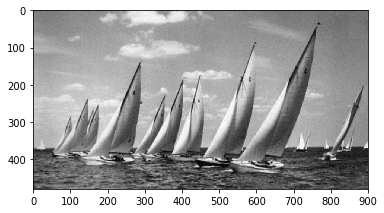

In [5]:
# Design the filter h
h = 1/9 * np.ones((3,3))

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.2 Filter the noisy image with a 5x5 moving average filter (5 points)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


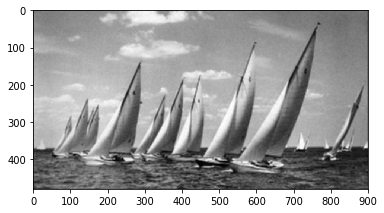

In [6]:
# Design the filter h
h = 1/25 * np.ones((5,5))

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.3 Filter the noisy image with a 9x9 moving average filter (5 points)

[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


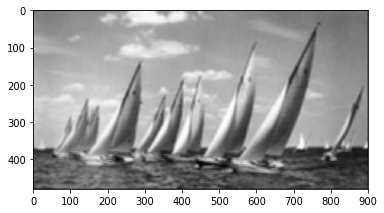

In [7]:
# Design the filter h
h = 1/81 * np.ones((9,9))

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.4 Comment on the filtering results when different window sizes are used (5 points)

As the size of the kernel increases, the pixel at the centre of the kernel is affected by pixels which are increasingly far away.

As a result of this, pixels relevant to highly localised features such as edges will make up a smaller fraction of the kernel. This causes edges to become increasingly diffuse as the kernel size increases because it is dominated by pixels which are representing bulk features (e.g. the sails and the sky).

Increasing the size of the filter may then reduce the amount of noise but it comes at the cost of more details within the image being small relative to the length scale of the kernel and therefore attenuated/lost.

# 2. Edge detection (35 points)

**Task:** Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters. Display the Sobel magnitude images and comment.

## 2.1 Implement 3x3 Sobel filters and convolve with the noisy image (5 points)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


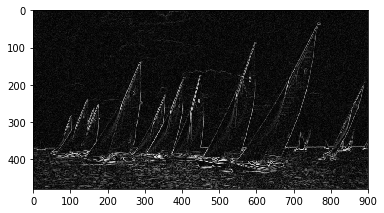

In [8]:
# Design the Sobel filters

row = np.array([1,0,-1])
h_sobel_x = np.tile(row, (3, 1))
h_sobel_y = h_sobel_x.T

# Print the filters
print(h_sobel_x)
print(h_sobel_y)

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_noisy, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_noisy, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.2 Design a 2D Gaussian filter (5 points)

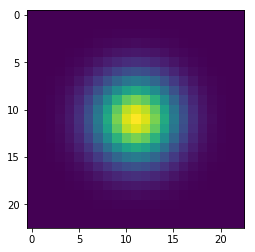

In [9]:
# Design the Gaussian filter

def gaussian_1d(x, sigma):
    # x: the distance from the mean at which to evaluation the gaussian
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: The value of the Gaussian distribution at this point
    return 1/(2 * math.pi * sigma**2) * np.exp(-x*x/(2 * sigma**2))
    
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    # The filter radius is 3.5 times sigma
    rad = int(math.ceil(3.5 * sigma))
    sz = 2 * rad + 1
    indices = np.linspace(-rad, rad, sz)
    # Get an array of values of a Gaussian distribution out to rad
    gaussian_row = gaussian_1d(indices, sigma)
    # Construct stacks of vertical and horizontal Gaussian kernels
    gaussian_hor = np.tile(gaussian_row, (sz, 1))
    gaussian_vert = gaussian_hor.T
    # Elementwise multiplication of kernels to form single kernel
    h = np.multiply(gaussian_hor, gaussian_vert)
    return h

# Display the Gaussian filter when sigma = 3 pixel
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

## 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels) before applying the Sobel filters (5 points)

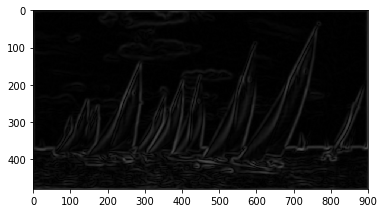

In [10]:
# Perform Gaussian smoothing before Sobel filtering
sigma = 3
h = gaussian_filter_2d(sigma)
image_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) before applying the Sobel filters. Evaluate the computational time for Gaussian smoothing. (5 points)

It takes 2.171500 seconds for performing Gaussian smoothing.


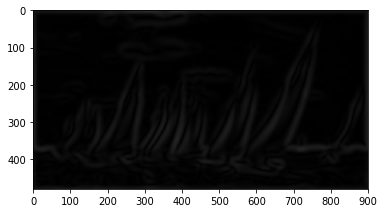

In [11]:
# Create the Gaussian filter
sigma = 7
h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same')
duration = time.time() - start
print('It takes {0:.6f} seconds for performing Gaussian smoothing.'.format(duration))

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.5 Design 1D Gaussian filters along x-axis and y-axis respectively. (5 points)

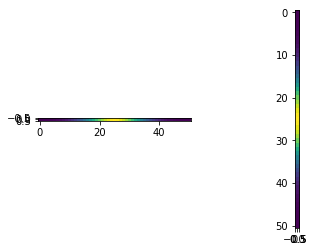

In [12]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    # The filter radius is 3.5 times sigma
    rad = int(math.ceil(3.5 * sigma))
    sz = 2 * rad + 1
    indices = np.linspace(-rad, rad, sz)
    h = 1/(2 * math.pi * sigma**2) * np.exp(-indices*indices/(2 * sigma**2))
    return h

# Display the Gaussian filters when sigma = 7 pixel
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)
h_x = np.expand_dims(h_x, axis=0)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma)
h_y = np.expand_dims(h_y, axis=-1)

# Display the filters
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

## 2.6 Perform Gaussian smoothing (sigma = 7 pixels) as two separable filters, then apply the Sobel filters. Evaluate the computational time for separable Gaussian filtering. (5 points)

It takes 0.180445 seconds for performing Gaussian smoothing.


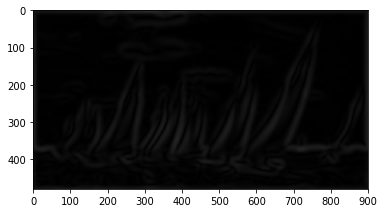

In [13]:
# Perform separable Gaussian smoothing before Sobel filtering
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, mode='same')
duration = time.time() - start
print('It takes {0:.6f} seconds for performing Gaussian smoothing.'.format(duration))

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.7 Comment on the filtering results (5 points)

By increasing the size of the gaussian filter from 3 to 7 pixels, we remove more fine details from the image. We are then selecting edges with a larger scale with the larger kernel as the smaller scaled edges are lost in the blurring.

The two methods (separable vs 2D kernels) of performing Gaussian smoothing produce the same output image, however the second method using separable filters is almost 12 times faster than using a 2D kernel. (~0.18s compared to ~2.17s)

This is because convolving an image with a $k\times k$ kernel requires $k^2$ multiplications and $k^2-1$ summations per pixel. For an $n \times n$ image, this gives $O(n^2k^2)$ complexity.

Comparing this with the separable filters: each kernel requires $k$ multiplications and $k-1$ summations per pixel. This gives us a complexity of $O(n^2k)$.

This different scaling with $k$ is responsible for the speedup of the separable filters relative to the 2D filter.

# 3. Laplacian filter (15 points)

**Task:** Perform Laplacian filtering and Laplacian of Gaussian filtering. Display the results and comment.

## 3.1 Implement a 3x3 Laplacian filter (5 points)

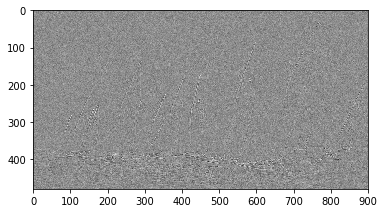

In [14]:
# Design the filter
h = [[0,1,0],
     [1,-4,1],
     [0,1,0]]

# Laplacian filtering
lap = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Display the results
plt.imshow(lap, cmap='gray')

## 3.2 Implement the Laplacian of Gaussian filter ($\sigma$ = 3 pixel) (5 points)

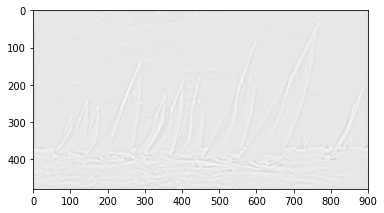

In [16]:
# Design the Gaussian filter
sigma = 3

# The Gaussian filter along x-axis
h_x = gaussian_filter_1d(sigma)
h_x = np.expand_dims(h_x, axis=0)

# The Gaussian filter along y-axis
h_y = gaussian_filter_1d(sigma)
h_y = np.expand_dims(h_y, axis=-1)

# Gaussian smoothing
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, mode='same')

plt.imshow(image_smoothed, cmap='gray')
# Design the Laplacian filter
h = np.array([[0,1,0],
              [1,-4,1],
              [0,1,0]])

# Laplacian filtering
lap = scipy.signal.convolve2d(image_smoothed, h, mode='same')
plt.imshow(lap, cmap='gray')

Below is shown the same image but with a different intensity scale to increase contrast in order to ease interpretation

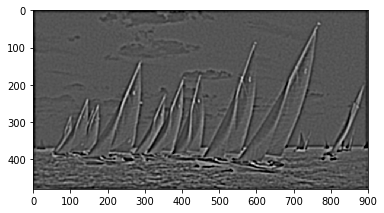

In [23]:
plt.imshow(lap, cmap='gray', vmin=-0.1, vmax=0.2)

## 3.3 Comments on the filtering results (5 points)

The Laplacian filter picks up on the second derivative of the pixel intensity. Therefore at an edge (where we would expect a sudden change in intensity), we would expect the second derivative to be large and negative on the brighter side and large and positive on the darker side of the edge. We may then place the edge at the zero-crossing between these two peaks.

If we look at the resulting image of the LoG filter we can see that this behaviour is seen at the edges between the relatively dark sails and the brighter sky and again between the light clouds and darker sky. In both cases we see a light/white outline on the darker side of the edge and a dark/black outline on the brighter side.

In comparison, the rest of the image has a value near zero giving a middling grey intensity.

# 4. Survey: How long does it take you to complete the coursework?

About 1 hour for the first pass through? I did touchups afterwards for extra time but majority of work was done in that first hour.